# Research Question: Is neo-colonialism a beneficial future model of the world?

**Members** : Nokutenda Dzobo  #69414241; Pham Ngoc Minh Anh #34502377; Felipe Flores #31080609; Dorine Benedict #88515697; Kai Holmstrom #87828448

## Introduction
This analysis evaluates the long-term rationality of neo-colonialism by comparing the economic, social, and environmental consequences of China’s foreign direct investment (FDI) in the Democratic Republic of Congo. We aim to determine whether the short-term benefits associated with neo-colonial relations within less industrialised countries outweigh the long-term benefits. We chose to use a Less industrialized country, such as the DRC, against a More Industrialized Country, like China, for our study because it presents a relatively clear and pronounced example of the benefits and risks associated with foreign economic influence.
Our research question will be addressed by evaluating the economic, social, and environmental indicators over time, with a focus on trends that coincide with increased Chinese investment since the early 2000s.

## 1) Economic aspect

As of 2022, China has provided 108 loans to the Democratic Republic of China worth $23.2 billion, these loans account for 97.9% of all funding from China and typically have long repayment periods and high interest rates. These loans are harming the DRC’s economy with 35% of their GDP going to cover their debts.

China also provides infrastructure development that the DRC could not otherwise afford with 85% of loans going towards infrastructure. This provides short term benefits for economic activity and public services. The DRC has been increasingly politically unstable and faced aid sanctions from the UN and World Bank, but China’s funding has stayed consistent. However, 28% of loans are causing financial stress to the DRC and the structure of the loans is causing the DRC’s economy to be resource dependent on finite resources.

Recently, in 2024 international pressure made the DRC and China change the deal to give the DRC more equity in their largest “resource-for-investment” deal in the Sicomines. Another change was to prohibit the DRC government from paying the loans with the national treasury if mining profits weren’t lucrative. The amendment focused more on grant financing to create stable funding and reduce reliance on loans.

While the loans may help the DRC in the short term, they are harmful for sustainable economic growth because they create a dependency on finite resources which then makes the DRC’s economy incredibly sensitive to the global market’s demand. This dependency trap could result in the country being trapped in a neo-colonial cycle similar to previous forms of exploitation from past colonial powers.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

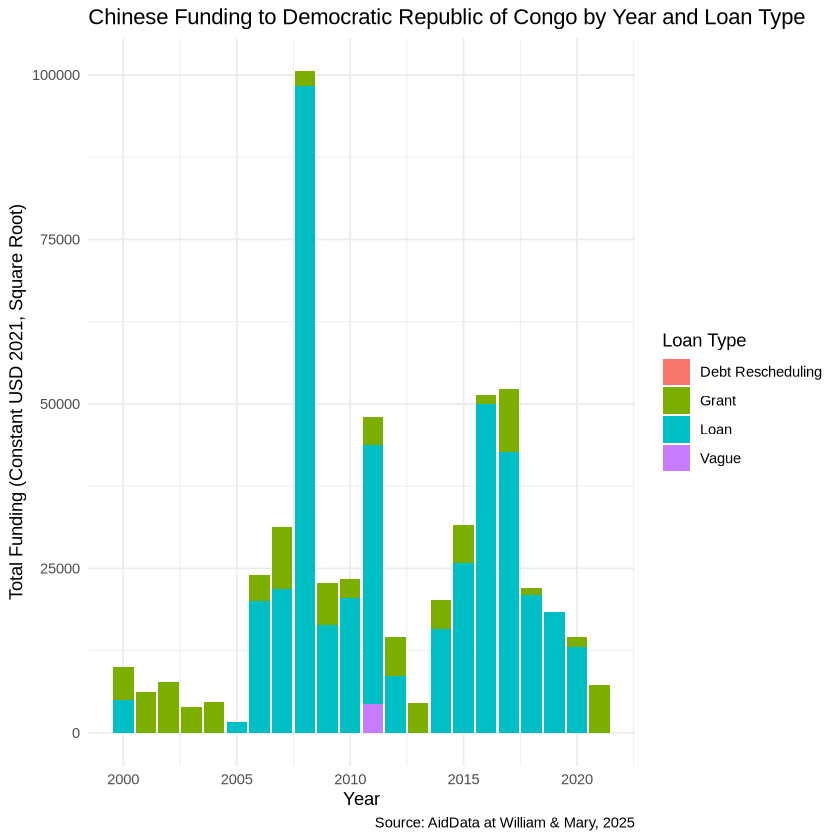

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
 
drc_data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTXa5hYMJSJ1F8abqXYHJ9vmMruxhGbF4iCJwgMnfRtS39YpWtf0VOY2jmFY_Vwmg/pub?output=csv")

funding_data <- drc_data %>%
select(`Commitment Year`,
       `Amount (Constant USD 2021)`,
       `Flow Type Simplified`)%>%
rename(Year = `Commitment Year`,
    AmountUSD =  `Amount (Constant USD 2021)`,
    FlowType =`Flow Type Simplified`) %>%
mutate (Year = as.numeric(Year),
        AmountUSD = as.numeric(AmountUSD))

funding_year_type <- funding_data %>%
  group_by(Year, FlowType) %>%
  summarise(TotalFunding = sum(AmountUSD, na.rm = TRUE)) %>%
  ungroup()

ggplot(funding_year_type, aes(x = Year, y = sqrt(TotalFunding), fill = FlowType)) +
  geom_col() +
  labs(title = "Chinese Funding to Democratic Republic of Congo by Year and Loan Type",
       x = "Year",
       y = "Total Funding (Constant USD 2021, Square Root)",
       fill = "Loan Type", caption = "Source: AidData at William & Mary, 2025") +
  theme_minimal() 

The DRC’s exports, but particularly imports, had increased exponentially in the last years, therefore rapidly boosting GDP. According to the World Bank, in 2023, the DRC exported a total of $29.3B, which includes $11.8B from refined copper and $2.4B of cobalt (OEC, 2025).  However, despite these incredible statistics, DRC shows a trend where imports override exports over time, resulting in a trade deficit (red shaded area). 

Additionally, DRC’s exports are mostly natural resources: dependence on exhaustible resources creates long-run risks, including limited diversification, resource depletion, and vulnerability to global market fluctuations. 

Finally, influential nations like China are evermore interested in the DRC's economic dynamism (in terms of resource extraction), as seen with China’s rising investments (also discussed above). This can   be associated with long-term problems where foreign investors buy up too many national important assets, resulting in a lack of economic independence. (Hayes, 2025).

Therefore, from an economic perspective, China and DRC’s relationship recreates the neo-colonial model, and such a trend has become clearer with time, not benefiting DRC sustainably. 

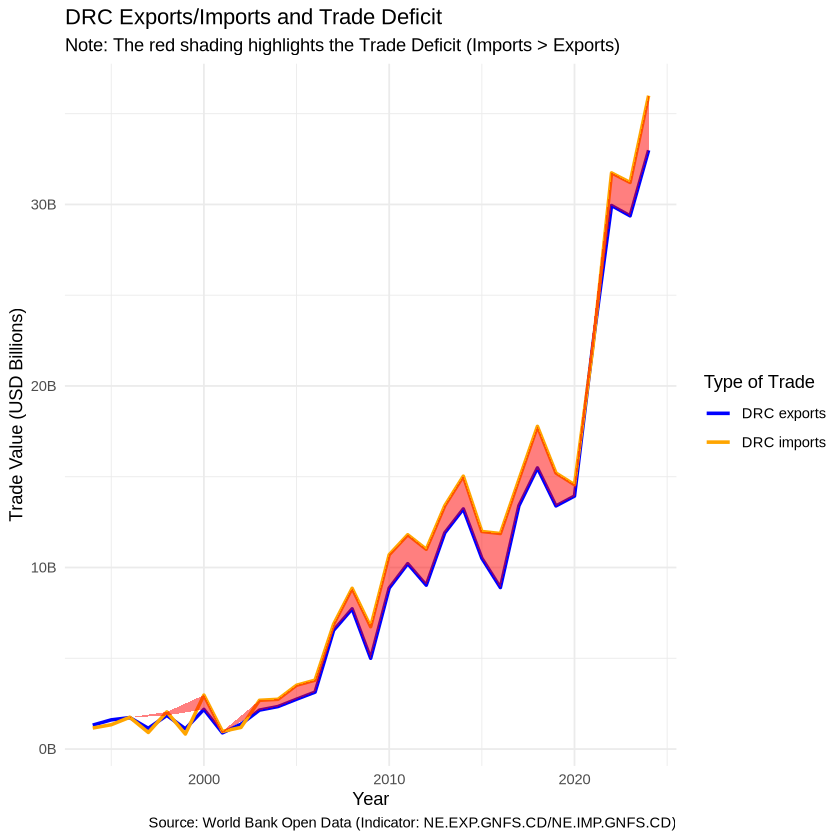

In [21]:
 #install.packages("WDI")
#library(WDI)

exports <- WDI(indicator = 'NE.EXP.GNFS.CD') %>% rename(`DRC exports`= NE.EXP.GNFS.CD) %>% filter(!is.na(`DRC exports`))

imports <- WDI(indicator = 'NE.IMP.GNFS.CD') %>% rename(`DRC imports` = NE.IMP.GNFS.CD) %>% filter(!is.na(`DRC imports`))

countries <- c('CD')

imports <- imports %>%
  filter(iso2c %in% countries) 

exports <- exports %>% 
  filter(iso2c %in% countries)

exports_imports <- inner_join(exports, imports, by = c('iso2c', 'iso3c', 'country', 'year'))

trade_ribbon_data <- exports_imports %>% 
mutate(balance = `DRC exports` - `DRC imports`,
    ymax_ribbon = pmax(`DRC exports`, `DRC imports`),
    ymin_ribbon = pmin(`DRC exports`, `DRC imports`)) %>%
 pivot_longer(cols = c(`DRC exports`, `DRC imports`), names_to = "Trade_Type", values_to = "Value_USD")

ribbon_plot <- ggplot(trade_ribbon_data, aes(x = year)) + geom_line(aes(y = Value_USD, color = Trade_Type), linewidth = 1) +
geom_ribbon(data = filter(trade_ribbon_data, balance < 0), aes(ymin = ymin_ribbon, ymax = ymax_ribbon), fill = "red", alpha = 0.5 ) +
  scale_color_manual(values = c(`DRC exports` = "blue", `DRC imports` = "orange")) +
scale_y_continuous(labels = function(x) paste0(x / 10^9, "B")) + labs(color = "Type of Trade",
    title = "DRC Exports/Imports and Trade Deficit", x = "Year", y = "Trade Value (USD Billions)", color = "Trade", subtitle = "Note: The red shading highlights the Trade Deficit (Imports > Exports)",
  caption = paste("Source: World Bank Open Data (Indicator: NE.EXP.GNFS.CD/NE.IMP.GNFS.CD)", sep = "\n")) + theme_minimal()

ribbon_plot

## 2) Military & Political aspect

The DRC has a long history of conflict with Rwanda, and despite 21st-century peace agreements, armed groups continue to emerge and disrupt DRC governments. Because the DRC holds some of the world’s largest reserves of strategic minerals, its conflicts quickly become globalized as foreign powers seek influence over these resources through conflict intervention.

The US has long been a major arms supplier in Africa, but its emphasis on democracy and restrictions such as embargos and conditional arms deals limits African military and economic sovereignty. In the 21st century, as China’s power grows, it has increasingly competed with the US for the role of Africa’s main arms provider. Its very rapid rise in arms exports relative to that of the US (*as could be seen in the graph*) and its appeal to African states come from its non-interference policy, offering weapons without imposing political conditions like the US.

However, the DRC’s growing neo-colonial  reliance on Chinese arms has significant consequences. China has gained control over many Congolese mineral reserves, and Congolese forces are tasked with protecting Chinese-owned sites per China’s requests. As a result, the DRC loses economic autonomy, with limited ability to manage or benefit from its own resources. Militarily, despite China’s non-interference rhetoric, the DRC must still accommodate Chinese strategic interests, meaning it does not gain true independence in its military decisions.

Rows: 50 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Recipient, 2000-2025, Percentage, Sum total years, Percentage of t...
dbl (26): 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


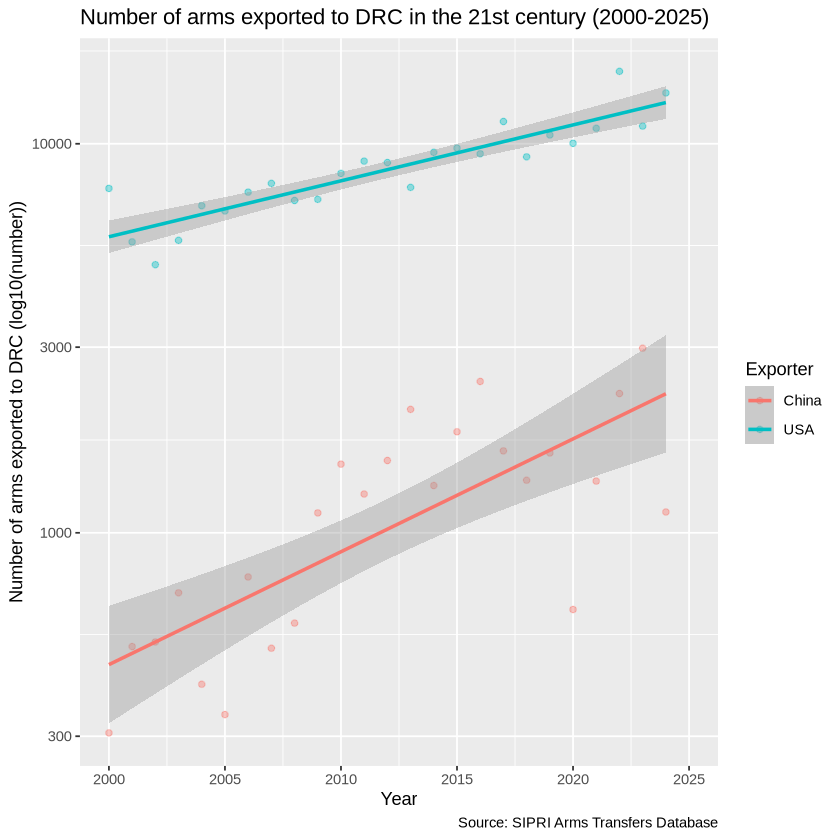

In [3]:
data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSysApr9H3d7RZFXdYnT2EkyxopGuRZO_HXkACbGK1FHtdYPDJma9grJPiUZoiFF16dm6cYSCIzhpHv/pub?output=csv", skip = 9)

data <- data |> filter(Recipient %in% c('Total exports from United States', 'Total exports from China', 'Total exports from Russia')) |> 
select(-'Percentage of total', -'Percentage', -'Sum total years', -'2000-2025')

datalong <- data |> pivot_longer('2000':'2025' , names_to = "year", values_to = "count")

datalong <- datalong |> mutate(Recipient = fct_recode(Recipient, 'China' = "Total exports from China", "USA" = "Total exports from United States", "Russia" = 'Total exports from Russia'))

datalong <- datalong |> mutate(year = as.numeric(year)) |> filter(Recipient %in% c("China", "USA"))
datalong <- datalong |> rename(Supplier = Recipient)

dataplot <- datalong |> ggplot(aes(x = year, y = count, color = Supplier)) + geom_point(alpha=0.4) + geom_smooth(method="lm") + scale_y_log10() + 
labs(x = "Year", y = "Number of arms exported to DRC (log10(number))", title = "Number of arms exported to DRC in the 21st century (2000-2025)", color = "Exporter", caption = "Source: SIPRI Arms Transfers Database")
dataplot

## 3) Environmental aspect
Mining, road construction, and charcoal production (which often expand with foreign investment) drive massive deforestation in southern DRC, especially in Lualaba and Haut-Katanga, where Chinese-owned cobalt mines are concentrated. The rate of decline became steeper after 2010, when operations started 

The entry and investment of China in the DRC have had negative effects on the DRC’s forest area through deforestation and severe forest degradation. 

The continuous decline of forest area in the DRC from 66% in 1990 to nearly 54% in 2021 coincides with the rise of large-scale foreign extraction, primarily through Chinese-led cobalt and copper mining. This pattern reflects a neo-colonial development model where infrastructure and investment are directed toward resource export rather than environmental protection. The steep downward trend illustrates how unsustainable mining practices, deforestation from open-pit operations, and land clearing for extraction have accelerated ecological degradation. Despite rising GDP and FDI, environmental well-being has deteriorated, highlighting the central contradiction of neo-colonialism: economic gains concentrated in the hands of the investor while long-term ecological costs fall on local communities.


Rows: 266 Columns: 69
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (34): 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, ...
lgl (31): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 33 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 33 rows containing missing values or values outside the scale range
(`geom_point()`).”


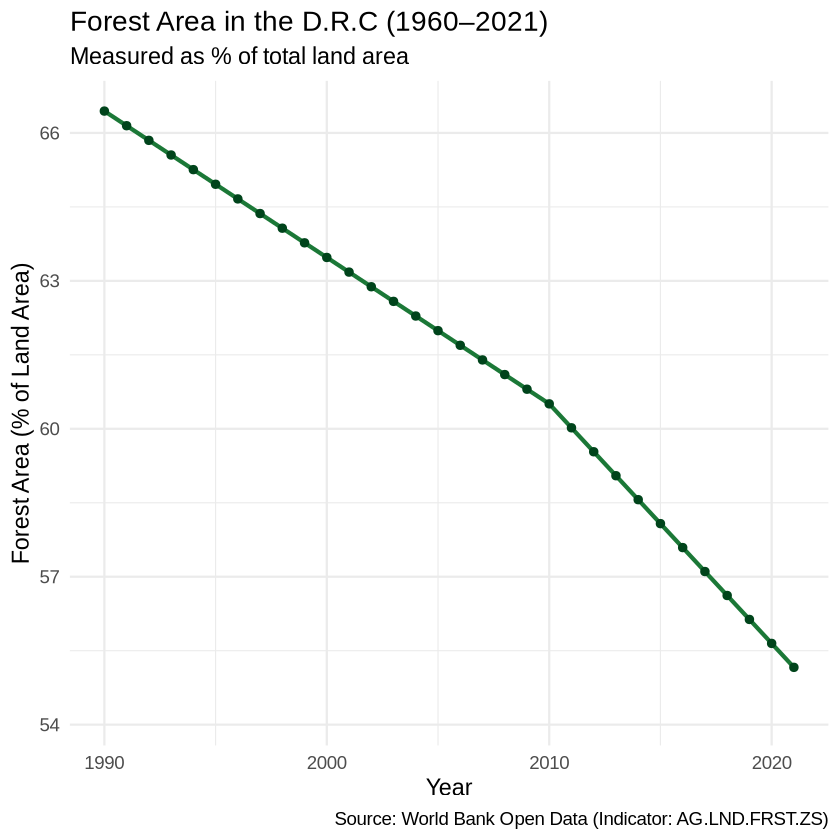

In [5]:
datan <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQPvJxDGXDb0hMZY3WDDirT5mnkPOCT4NNVT_vpqorYS3Eb7emn10pjFyXLDS9AwSZEYdNa4AKJ30XW/pub?output=csv", skip = 3)

drc <- datan %>%
  filter(`Country Name` == "Congo, Dem. Rep.")
drc_long <- drc %>%
  pivot_longer(
    cols = `1960`:`2024`,
    names_to = "Year",
    values_to = "Forest_Percent") %>%
 mutate(Year = as.numeric(Year))

ggplot(drc_long, aes(x = Year, y = Forest_Percent)) +
  geom_line(color = "#1b7837", size = 1.2) +
  geom_point(color = "#00441b", size = 2) +
  theme_minimal(base_size = 14) +
  labs(title = "Forest Area in the D.R.C (1960–2021)", subtitle = "Measured as % of total land area", x = "Year", y = "Forest Area (% of Land Area)", caption = "Source: World Bank Open Data (Indicator: AG.LND.FRST.ZS)") + scale_x_continuous(limits = c(1990,2021))

## Conclusion
To conclude, neo-colonialism is only beneficial from a narrow, short-term economic lens, as it presents a long-term model that is fundamentally detrimental. 

The data reveals a paradox in the economic development of the DRC. As FDI increases in DRC, there is a rise in DRC’s overall GDP, suggesting a causal link for overall economic growth. However, the inescapable trade-off DRC has to pay for the short-term inflow is the long-term financial dependency the DRC would have on China in the form of loans. The analysis reveals the connection between the mining-focused infrastructure projects and escalating Environmental, Social, and Governance (ESG) risks. By forcing DRC forces to protect China’s mineral reserves, the DRC loses its military autonomy while having to compensate for China’s strategic interests. 
This confirms that this model prioritizes mineral extraction over long-term human and ecological health of the DRC. 

In essence, despite the short-term economic gain, when social, environmental, and cultural factors are presented, the data show that neocolonialism is a model that generates profound long-term inequality, dependency, and harm, rendering it an irrational and ultimately unsustainable future model for the world.

Finally, this neo-colonial model, amidst its detrimental effects, is still present. This is because while many Global South countries are harmed, the global leaders such as China, the US, EU are substantially benefiting from such a model. The power imbalance between these two categories of countries (LEDCs vs MEDCs) allows for the continuation of the neo-colonial model. 

## Bibliography

**Bromley, M., & Holtom, P.** (2010). *Arms transfers to the Democratic Republic of the Congo: Assessing the system of arms transfer notifications, 2008–10* (SIPRI Background Paper). Stockholm International Peace Research Institute. https://www.sipri.org/sites/default/files/files/misc/SIPRIBP1010a.pdf

**Conteh-Morgan, E., & Weeks, P.** (2015). *Is China playing a contradictory role in Africa? Security implications of its arms sales and peacekeeping* (2nd ed., Vols. 1–7, Ser. 1). Policy Studies Organization. https://gsis.scholasticahq.com/api/v1/articles/27778-is-china-playing-a-contradictory-role-in-africa-security-implications-of-its-arms-sales-and-peacekeeping.pdf

**Council on Foreign Relations.** (n.d.). *Conflict in the Democratic Republic of Congo*. Global Conflict Tracker. https://www.cfr.org/global-conflict-tracker/conflict/violence-democratic-republic-congo

**Global Forest Watch.** (2023). *Democratic Republic of the Congo: Forest change data*. World Resources Institute. https://www.globalforestwatch.org

**Global Witness.** (2021). *Congo’s resource curse: Chinese mining, corruption, and environmental destruction*. https://www.globalwitness.org

**Human Rights Watch.** (2019). *“What do we get out of it?” The human rights impact of Chinese mining operations in the DRC*. https://www.hrw.org

**Sutter, J. T.** (2021, September). *Motivations behind China’s arms sales to Sub-Saharan African countries* [Master’s thesis, Johns Hopkins University]. JScholarship. https://jscholarship.library.jhu.edu/server/api/core/bitstreams/4b8cca05-f8ff-4692-8a11-734c33a127ed/content

**Thome, L.** (2025, October 16). *Democratic Republic of the Congo: Chinese development finance profile, 2000–2022*. AidData. https://www.aiddata.org/publications/democratic-republic-of-congo-chinese-development-finance-profile-2000-2022

**World Bank.** (2022). *Forest area (% of land area): Democratic Republic of the Congo*. World Development Indicators. https://data.worldbank.org

## Attribution
**Nokutenda Dzobo #69414241** Analysis on environmental impact specifically deforestation due to Chinese-owned mines. Transferred documents into Jupyter notebook for final proposal.

**Pham Ngoc Minh Anh #34502377** Analysis on the number of arms exported to the DRC from China, and its political and socio-economic consequences. Transferred and organised code into Jupyter Notebook for final project submission. Made the poster and organised everyone’s analysis.

**Felipe Flores #31080609** Analysis on the exports and imports from China, and its short and long-term economic consequences.

**Dorine Benedict #88515697** Analysis on the funding and type of funding to the DRC from China, and how the funding type is contributing to economic dependence. 

**Kai Holmstrom #87828448** Assisted everyone in compiling and analysing research and exporting it to Jupyter notebook. Organized project bibliography and references.